<a href="https://colab.research.google.com/github/Anann99/Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SETTING UP THE ENVIORMENT 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


IMPORTING THE DATABASE 

In [34]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [35]:
import io
churn = pd.read_csv(io.BytesIO(uploaded['train.csv']))


READING THE DATABASE

In [36]:
churn.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [37]:
churn.shape

(4250, 20)

Checking for missing values using .info()

In [38]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

No missing values

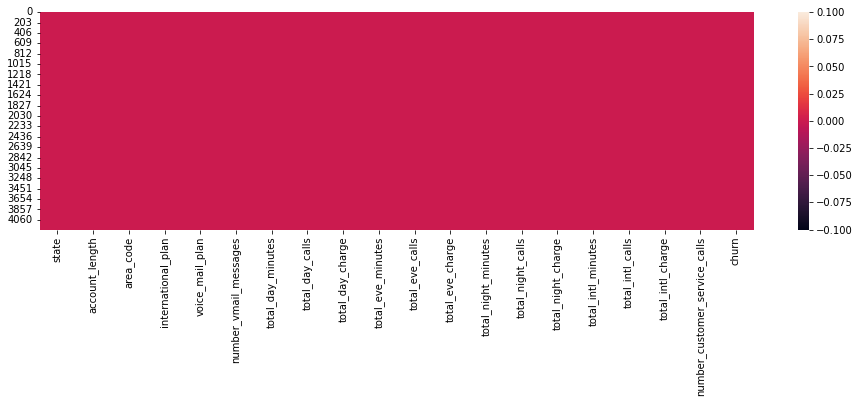

In [39]:
sns.heatmap(churn.isnull())

In [40]:
print(churn.nunique())

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64


In [41]:
churn.state.unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

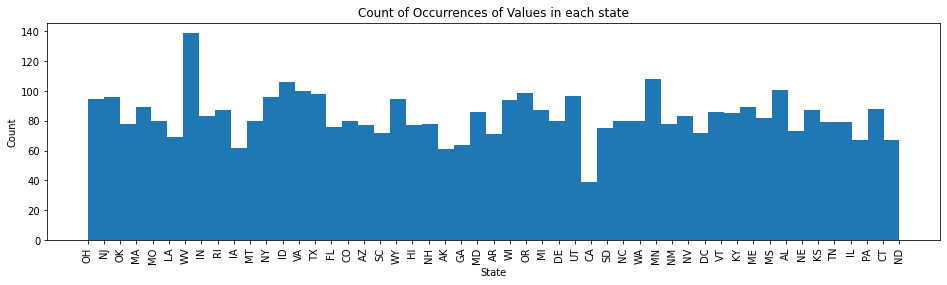

In [42]:
# Plot a histogram of the column values
plt.rcParams['figure.figsize'] = [16, 4]
plt.hist(churn['state'], bins=len(churn['state'].unique()))

# Add labels and title to the plot
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Occurrences of Values in each state')

# Show the plot
plt.show()

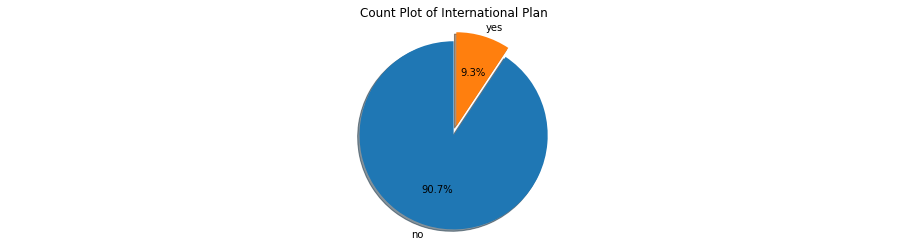

In [43]:
data = churn.international_plan.value_counts()
label = churn['international_plan'].unique()
 
plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90)
plt.title('Count Plot of International Plan')
plt.axis('equal')
plt.show()

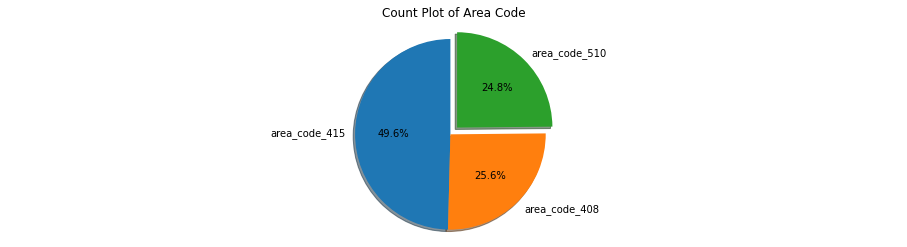

In [44]:
data = churn.area_code.value_counts()
label = churn['area_code'].unique()
 
plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0,0.1], shadow=True, startangle=90)
plt.title('Count Plot of Area Code')
plt.axis('equal')
plt.show()

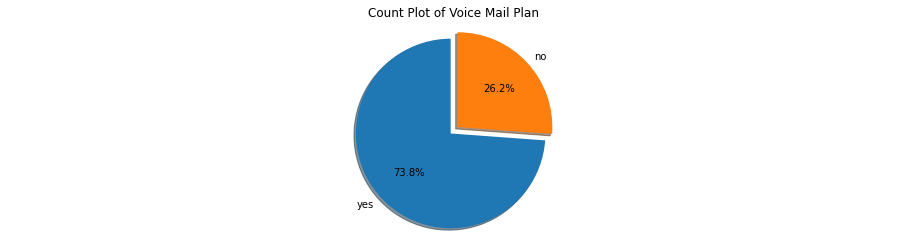

In [45]:
data = churn.voice_mail_plan.value_counts()
label = churn['voice_mail_plan'].unique()
 
plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90)
plt.title('Count Plot of Voice Mail Plan')
plt.axis('equal')
plt.show()

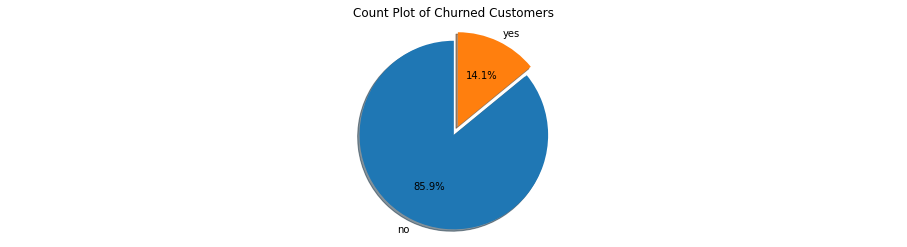

In [46]:
data = churn.churn.value_counts()
label = churn['churn'].unique()
 
plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle=90)
plt.title('Count Plot of Churned Customers')
plt.axis('equal')
plt.show()

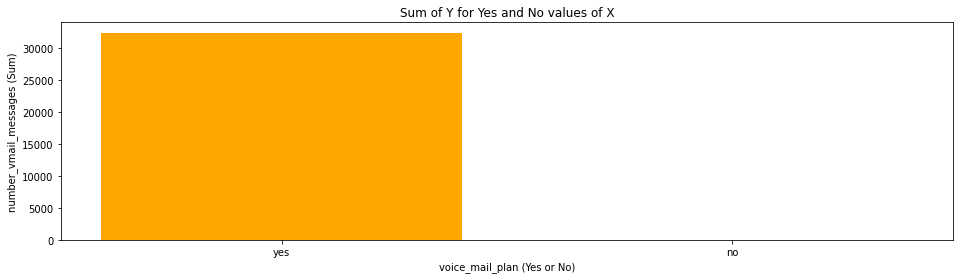

In [47]:
# calculate the sum of Y for Yes and No values of X
yes_sum = churn[churn['voice_mail_plan'] == 'yes']['number_vmail_messages'].sum()
no_sum = churn[churn['voice_mail_plan'] == 'no']['number_vmail_messages'].sum()

# plot the bar graph
plt.bar(['yes', 'no'], [yes_sum, no_sum], color = 'orange')

# add labels and title
plt.xlabel('voice_mail_plan (Yes or No)')
plt.ylabel('number_vmail_messages (Sum)')
plt.title('Sum of Y for Yes and No values of X')

# show plot
plt.show()

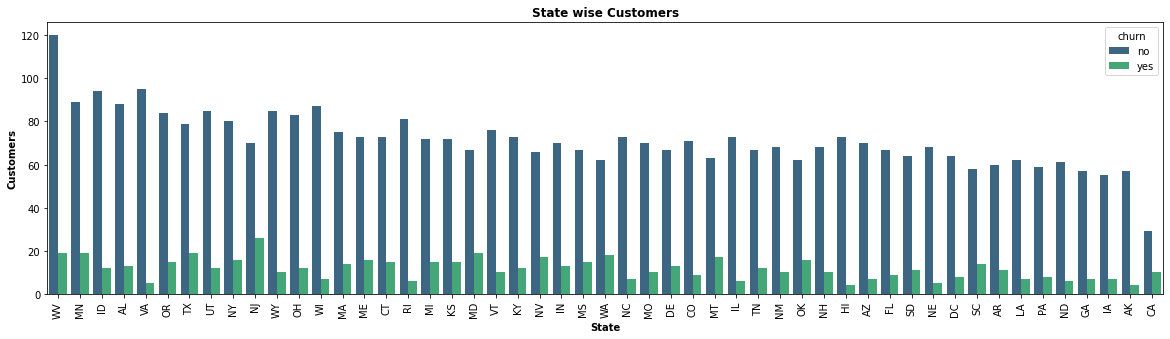

In [48]:
fig, ax=plt.subplots(figsize=(20,5))
sns.countplot(data = churn, x='state', order=churn['state'].value_counts().index, palette='viridis', hue='churn')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('State wise Customers', fontsize=12, fontweight='bold')
plt.show()


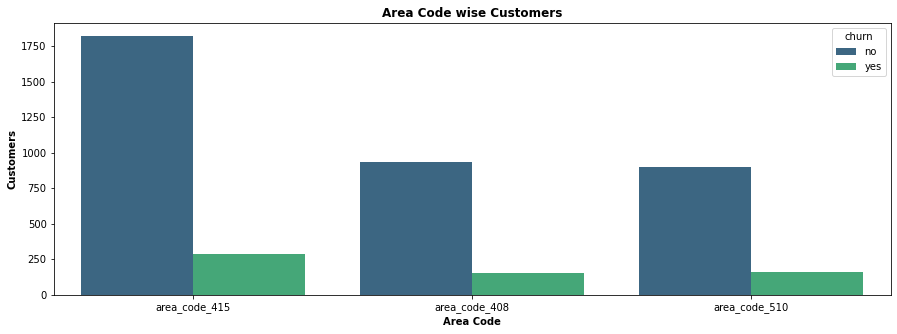

In [49]:
fig2, ax=plt.subplots(figsize=(15,5))
sns.countplot(data = churn, x='area_code', order=churn['area_code'].value_counts().index, palette='viridis', hue='churn')
plt.xlabel('Area Code', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('Area Code wise Customers', fontsize=12, fontweight='bold')
plt.show()

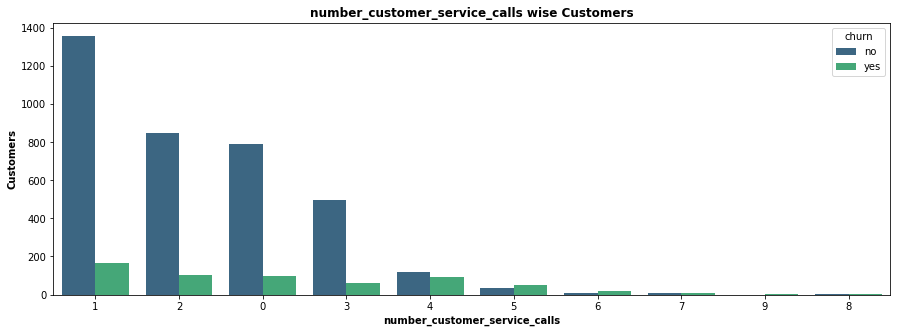

In [50]:
fig3, ax=plt.subplots(figsize=(15,5))
sns.countplot(data = churn, x='number_customer_service_calls', order=churn['number_customer_service_calls'].value_counts().index, palette='viridis', hue='churn')
plt.xlabel('number_customer_service_calls', fontsize=10, fontweight='bold')
plt.ylabel('Customers', fontsize=10, fontweight='bold')
plt.title('number_customer_service_calls wise Customers', fontsize=12, fontweight='bold')
plt.show()

As we can observe from the graph plotted, the rate or the percentage of churning increases as the number of service calls made by the customers inceases and when the churned customers even surpass the non churned customers for 5 service calls.

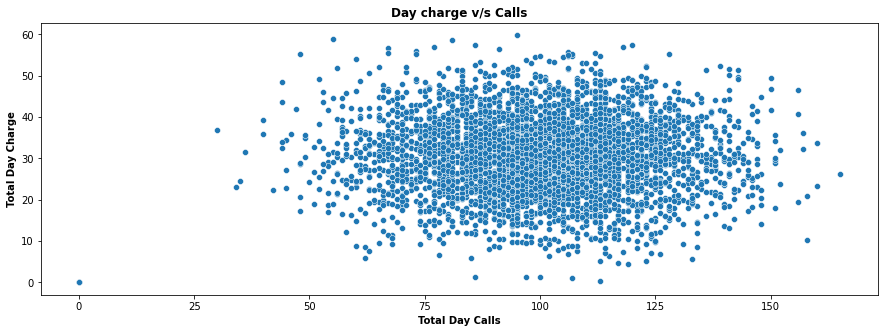

In [51]:
fig4, ax=plt.subplots(figsize=(15,5))
sns.scatterplot(data = churn, x='total_day_calls',y='total_day_charge' , palette='viridis')
plt.xlabel('Total Day Calls', fontsize=10, fontweight='bold')
plt.ylabel('Total Day Charge', fontsize=10, fontweight='bold')
plt.title('Day charge v/s Calls', fontsize=12, fontweight='bold')
plt.show()

In [52]:
churn[churn.total_day_calls==0]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1138,SD,98,area_code_415,no,no,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,yes
1183,VT,101,area_code_510,no,no,0,0.0,0,0.0,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,no


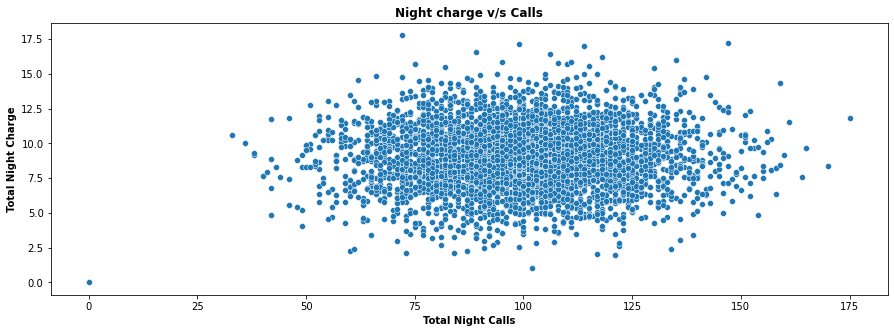

In [53]:
fig3, ax=plt.subplots(figsize=(15,5))
sns.scatterplot(data = churn, x='total_night_calls',y='total_night_charge' , palette='viridis')
plt.xlabel('Total Night Calls', fontsize=10, fontweight='bold')
plt.ylabel('Total Night Charge', fontsize=10, fontweight='bold')
plt.title('Night charge v/s Calls', fontsize=12, fontweight='bold')
plt.show()

In [54]:
churn[churn.total_night_calls==0]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4001,IL,53,area_code_415,no,no,0,214.3,138,36.43,232.2,99,19.74,0.0,0,0.0,8.3,5,2.24,1,no


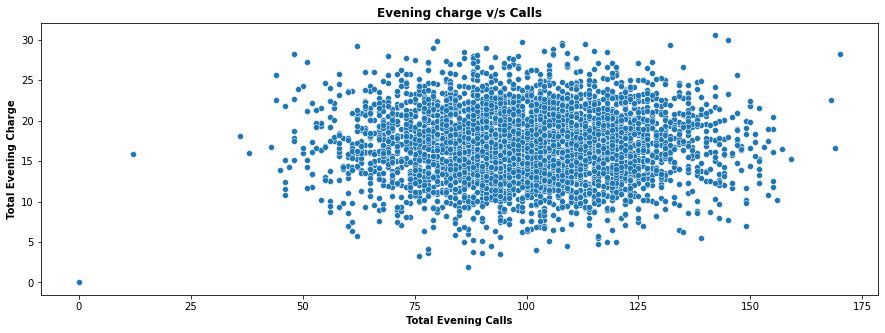

In [55]:
fig2, ax=plt.subplots(figsize=(15,5))
sns.scatterplot(data = churn, x='total_eve_calls',y='total_eve_charge' , palette='viridis')
plt.xlabel('Total Evening Calls', fontsize=10, fontweight='bold')
plt.ylabel('Total Evening Charge', fontsize=10, fontweight='bold')
plt.title('Evening charge v/s Calls', fontsize=12, fontweight='bold')
plt.show()

In [56]:
churn[churn.total_eve_calls==0]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2482,UT,97,area_code_415,no,no,0,209.2,134,35.56,0.0,0,0.0,175.4,94,7.89,11.8,6,3.19,1,no


In [57]:
data2 = churn.drop([1138,1183,2482,4001])

In [58]:
data2.describe()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,100.248469,7.638954,180.329675,99.937353,30.656597,200.224965,100.188884,17.019350,200.596373,99.868347,9.026974,10.257701,4.426755,2.770094,1.558879
std,39.710433,13.444170,53.891569,19.725796,9.161559,50.172769,19.851145,4.264688,50.276659,20.043013,2.262462,2.760228,2.463525,0.745237,1.311432
min,1.000000,0.000000,2.600000,30.000000,0.440000,22.300000,12.000000,1.900000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.425000,87.000000,24.385000,166.050000,87.000000,14.115000,167.300000,86.000000,7.530000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.500000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.275000,113.000000,36.765000,233.800000,114.000000,19.870000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


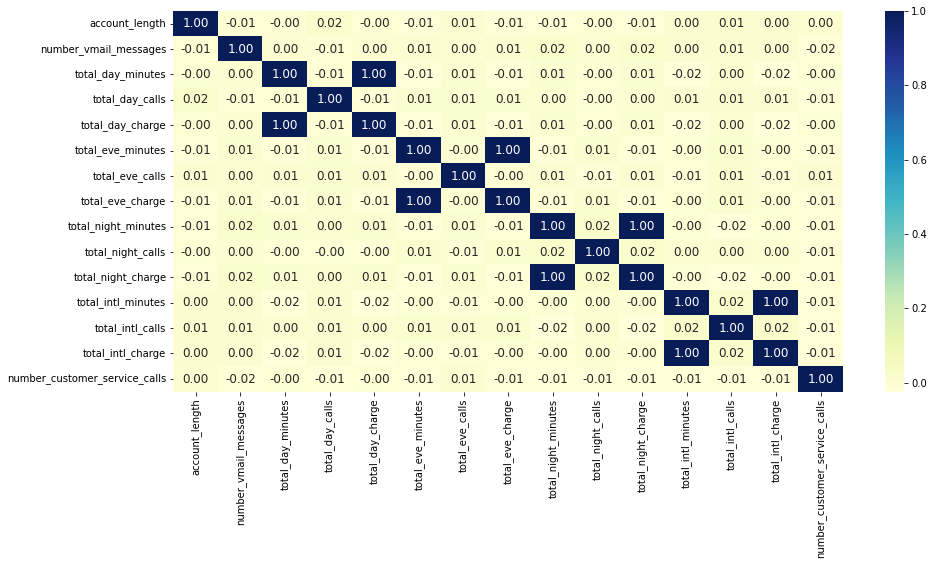

In [59]:
corr = data2.corr()
fig4, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,cmap="YlGnBu",annot_kws={'size': 12},fmt=".2f")

In [60]:
data2['day_rate'] = data2['total_day_charge']/data2['total_day_minutes']
data2['eve_rate'] = data2['total_eve_charge']/data2['total_eve_minutes']
data2['night_rate'] = data2['total_night_charge']/data2['total_night_minutes']
data2['intl_rate'] = data2['total_intl_charge']/data2['total_intl_minutes']

In [61]:
data2.drop({'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'},axis=1,inplace= True)

In [62]:
data2.dropna(inplace=True)

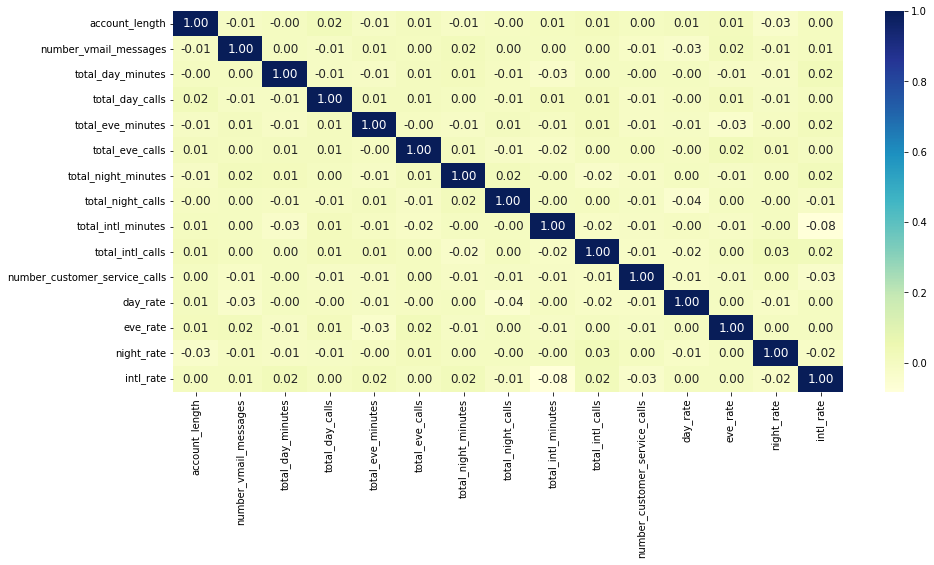

In [63]:
corr = data2.corr()
fig5, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,cmap="YlGnBu",annot_kws={'size': 12},fmt=".2f")

In [64]:
X0=data2.drop('churn', axis=1)
y= data2.churn

In [65]:
X0.columns


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls', 'day_rate',
       'eve_rate', 'night_rate', 'intl_rate'],
      dtype='object')

In [66]:
X0.shape

(4224, 19)

In [67]:
X1= pd.get_dummies(X0, drop_first = True)
X1.shape

(4224, 69)

MODEL DESIGNING

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, train_size=0.80,test_size=0.20,random_state=1)

In [70]:
print(X_train.isnull().sum().any())
print(X_valid.isnull().sum().any())
print(y_train.isnull().sum().any())
print(y_valid.isnull().sum().any())

False
False
False
False


No missing values present

In [71]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [72]:
X_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
1170,36,0,202.4,115,230.7,115,202.0,127,10.2,2,...,0,0,0,0,0,0,1,0,0,0
2689,41,0,223.8,67,244.8,74,223.8,156,12.3,5,...,0,0,0,0,0,1,0,1,0,0
2578,95,0,190.2,119,157.1,70,181.5,120,14.0,6,...,0,0,0,0,0,0,0,0,0,0
126,56,0,226.0,112,248.5,118,140.5,142,6.9,11,...,0,0,0,0,0,0,1,0,0,0
1087,129,0,98.0,99,240.7,62,254.8,123,10.5,4,...,0,0,0,0,0,0,0,0,0,0


Accuracy is:  92  %


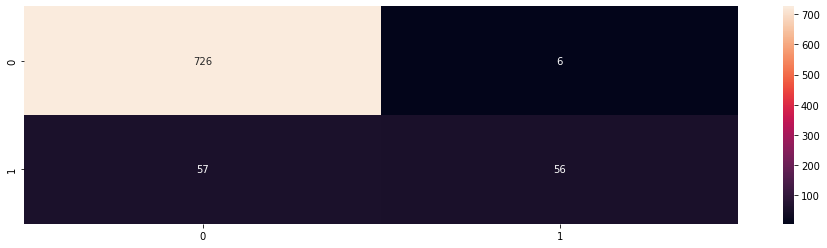

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=20 ,random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_valid,clf_rf.predict(X_valid))
print('Accuracy is: ',int(ac*100)," %")
cm = confusion_matrix(y_valid,clf_rf.predict(X_valid))
sns.heatmap(cm,annot=True,fmt="d")

Our model can successfully predict wether an account will churn or not with an accuracy of 92%